In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_mape(y_true: np.ndarray, y_pred: np.ndarray):
    res = 100*(abs((y_true - y_pred)/y_true)).mean()
    return res

def get_mae(y_true: np.ndarray, y_pred: np.ndarray):
    res = (abs(y_true - y_pred)).mean()
    return res

def get_cvrmse(y_true: np.ndarray, y_pred: np.ndarray):
    n = len(y_true)
    p = 1
    res = 100*(((y_true - y_pred)**2).sum()/(n-p))**0.5/y_true.mean()
    return res

def get_nmbe(y_true: np.ndarray, y_pred: np.ndarray):
    n = len(y_true)
    p = 1
    be = (y_true - y_pred).sum()
    res = 100*be/((n-p)*y_true.mean())
    return res

In [3]:
def draw_line_plot(train_res_df, test_res_df, method_name = 'MLP',
                   err_metrics = ['MAPE', 'MAE', 'CVRMSE', 'NMBE']):
    fig, axs=plt.subplots(2, 1, figsize = (20, 10))
    axs[0].plot(train_res_df['Fcw_yobse'], color = 'blue', 
                linewidth = 4, label = 'y_observed')
    axs[0].plot(train_res_df['Fcw_ypred'], color = 'red', 
                linestyle = '--', label = f'{method_name}_y_predicted')
    axs[0].legend(loc='upper right', fontsize = 13)
    axs[0].set_title('Training Performance using 2020 Data', fontsize = 15)
    axs[0].set_ylabel('Chilled Water Mass Flow Rate (kg/s)', fontsize = 15)
    train_y_max = 100*(1+max(train_res_df['Fcw_yobse'])//100)
    axs[0].set_ylim([0, train_y_max])
    err_text = ''
    for err_metric in err_metrics:
        if err_metric == 'MAPE':
            err = round(get_mape(y_true = train_res_df['Fcw_yobse'].values,
                           y_pred = train_res_df['Fcw_ypred'].values), 2)
            err_text += f'MAPE: {err}%\n'
        elif err_metric == 'MAE':
            err = round(get_mae(y_true = train_res_df['Fcw_yobse'].values,
                           y_pred = train_res_df['Fcw_ypred'].values), 2)
            err_text += f'MAE: {err}\n'
        elif err_metric == 'CVRMSE':
            err = round(get_cvrmse(y_true = train_res_df['Fcw_yobse'].values,
                           y_pred = train_res_df['Fcw_ypred'].values), 2)
            err_text += f'CVRMSE: {err}%\n'
        elif err_metric == 'NMBE':
            err = round(get_nmbe(y_true = train_res_df['Fcw_yobse'].values,
                           y_pred = train_res_df['Fcw_ypred'].values), 2)
            err_text += f'NMBE: {err}%\n'
    print(err_text)
    axs[0].text(-50, train_y_max*0.98, err_text,
             horizontalalignment='left',
             verticalalignment='top',
             fontsize = 12,
             color = 'b')
        
    
    axs[1].plot(test_res_df['Fcw_yobse'], color = 'green', 
                linewidth = 4, label = 'y_observed')
    axs[1].plot(test_res_df['Fcw_ypred'], color = 'purple', 
                linestyle = '--', label = f'{method_name}_y_predicted')
    axs[1].legend(loc='upper right', fontsize = 13)
    axs[1].set_title('Testing Performance using 2021 Data', fontsize = 15)
    axs[1].set_ylabel('Chilled Water Mass Flow Rate (kg/s)', fontsize = 15)
    axs[1].set_xlabel('Timestamps (Hourly)', fontsize = 15)
    test_y_max = 100*(1+max(test_res_df['Fcw_yobse'])//100)
    axs[1].set_ylim([0, test_y_max])
    err_text = ''
    for err_metric in err_metrics:
        if err_metric == 'MAPE':
            err = round(get_mape(y_true = test_res_df['Fcw_yobse'].values,
                           y_pred = test_res_df['Fcw_ypred'].values), 2)
            err_text += f'MAPE: {err}%\n'
        elif err_metric == 'MAE':
            err = round(get_mae(y_true = test_res_df['Fcw_yobse'].values,
                           y_pred = test_res_df['Fcw_ypred'].values), 2)
            err_text += f'MAE: {err}\n'
        elif err_metric == 'CVRMSE':
            err = round(get_cvrmse(y_true = test_res_df['Fcw_yobse'].values,
                           y_pred = test_res_df['Fcw_ypred'].values), 2)
            err_text += f'CVRMSE: {err}%\n'
        elif err_metric == 'NMBE':
            err = round(get_nmbe(y_true = test_res_df['Fcw_yobse'].values,
                           y_pred = test_res_df['Fcw_ypred'].values), 2)
            err_text += f'NMBE: {err}%\n'
    print(err_text)
    axs[1].text(-30, test_y_max*0.98, err_text,
             horizontalalignment='left',
             verticalalignment='top',
             fontsize = 12,
             color = 'g')
    plt.subplots_adjust(hspace=0.15)


MAPE: 1.73%
MAE: 7.25
CVRMSE: 1.87%
NMBE: -0.13%

MAPE: 10.22%
MAE: 26.12
CVRMSE: 10.05%
NMBE: -3.51%



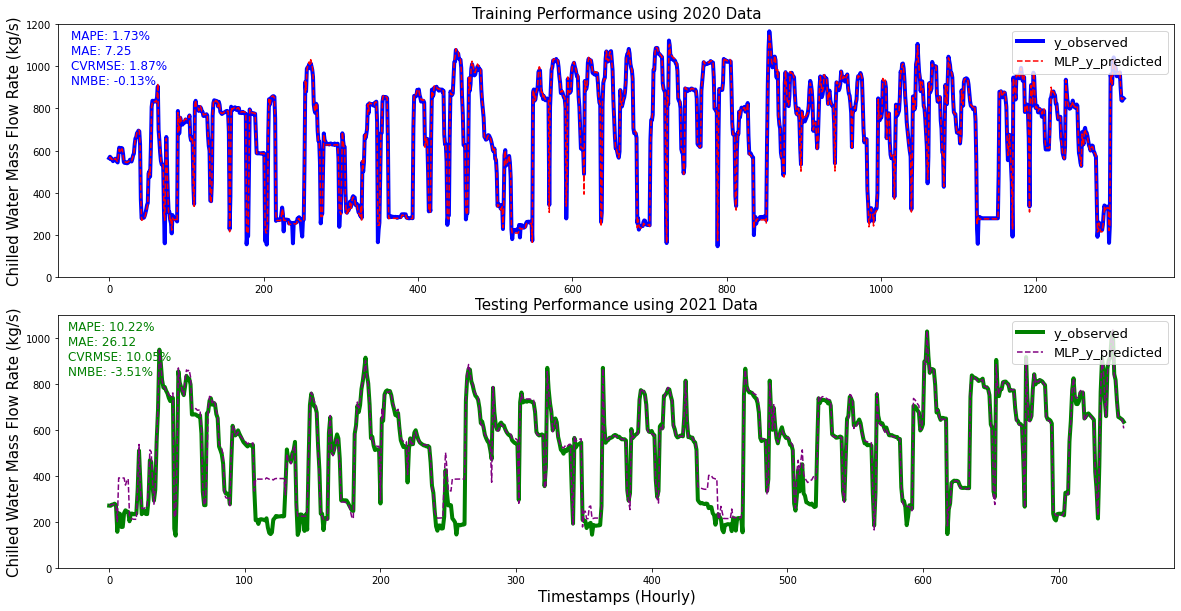

In [120]:
mlp_train_df = pd.read_csv('datadriven_res/mlp_train_ts_res.csv')/3.6
mlp_test_df = pd.read_csv('datadriven_res/mlp_test_ts_res.csv')/3.6
draw_line_plot(mlp_train_df, mlp_test_df, method_name = 'MLP')


MAPE: 3.52%
MAE: 16.23
CVRMSE: 3.99%
NMBE: 0.08%

MAPE: 15.96%
MAE: 42.87
CVRMSE: 14.7%
NMBE: -6.53%



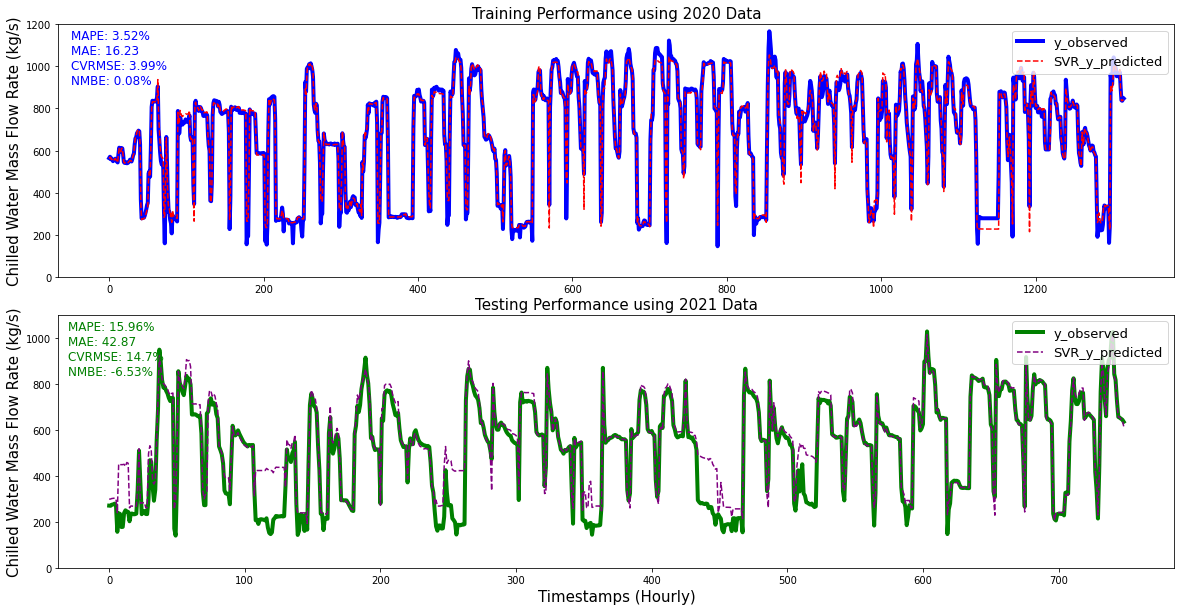

In [121]:
svr_train_df = pd.read_csv('datadriven_res/svr_train_ts_res.csv')/3.6
svr_test_df = pd.read_csv('datadriven_res/svr_test_ts_res.csv')/3.6
draw_line_plot(svr_train_df, svr_test_df, method_name = 'SVR')

MAPE: 1.75%
MAE: 7.42
CVRMSE: 1.88%
NMBE: 0.0%

MAPE: 18.35%
MAE: 44.68
CVRMSE: 21.79%
NMBE: -5.9%



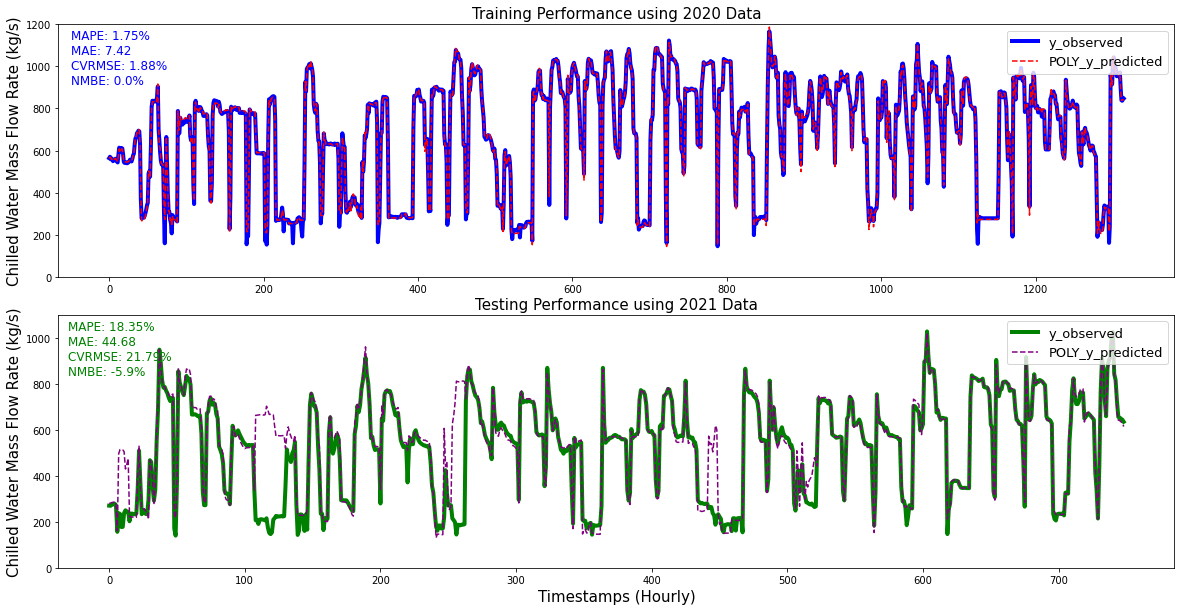

In [122]:
poly_train_df = pd.read_csv('datadriven_res/poly_train_ts_res.csv')/3.6
poly_test_df = pd.read_csv('datadriven_res/poly_test_ts_res.csv')/3.6
draw_line_plot(poly_train_df, poly_test_df, method_name = 'POLY')

MAPE: 2.14%
MAE: 9.47
CVRMSE: 2.24%
NMBE: 0.0%

MAPE: 13.99%
MAE: 44.91
CVRMSE: 12.26%
NMBE: -1.0%



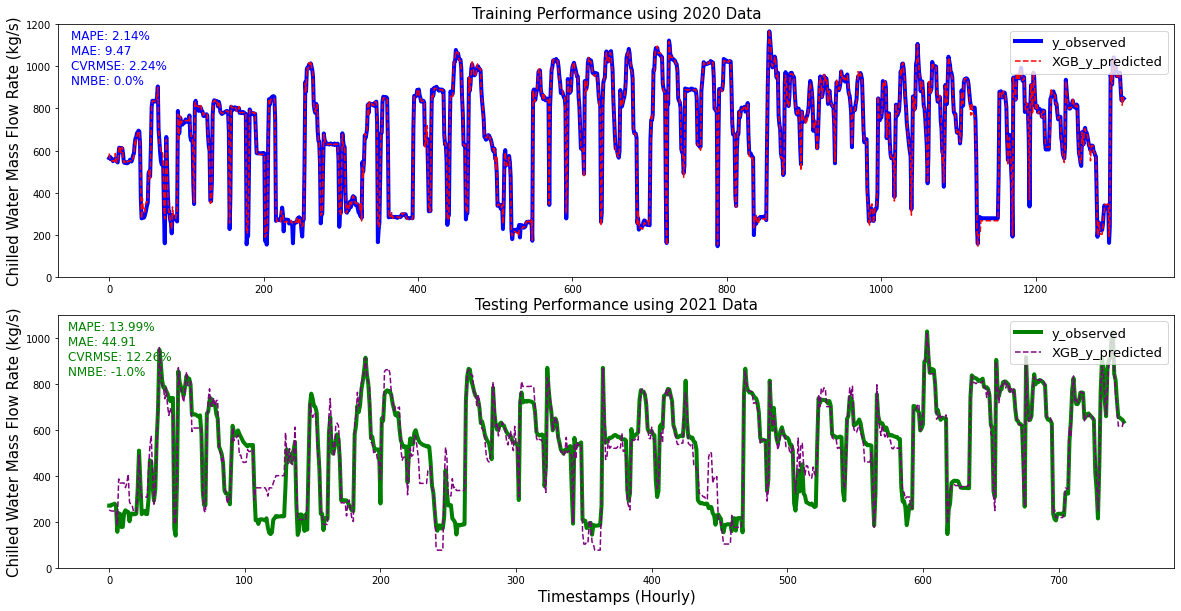

In [123]:
xgb_train_df = pd.read_csv('datadriven_res/xgb_train_ts_res.csv')/3.6
xgb_test_df = pd.read_csv('datadriven_res/xgb_test_ts_res.csv')/3.6
draw_line_plot(xgb_train_df, xgb_test_df, method_name = 'XGB')

MAPE: 4.51%
MAE: 23.91
CVRMSE: 6.67%
NMBE: 2.4%

MAPE: 4.51%
MAE: 23.91
CVRMSE: 6.67%
NMBE: 2.4%



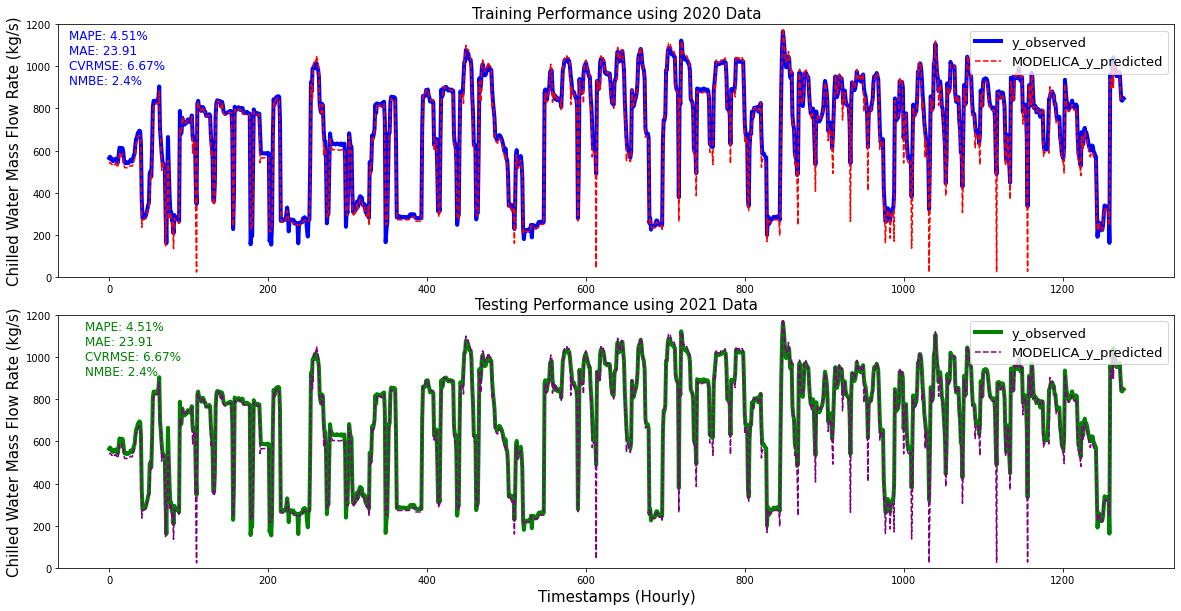

In [7]:
mo_train_df_pred = pd.read_csv('../cali_exp_4/run_1699339352.8566556/calibrated_model/sim_res_cali.csv')
mo_train_df_obse = pd.read_csv('../2020P2_calibration_data_60m.csv')
mo_train_df = pd.DataFrame()
mo_train_df['Fcw_ypred'] = mo_train_df_pred['Fcw_ypred'].values
mo_train_df['Fcw_yobse'] = mo_train_df_obse['NB2_S_x_NYZ_x_x_Fcw_x'].values
mo_train_df = mo_train_df.loc[mo_train_df['Fcw_yobse']>0]

#mo_test_df_pred = pd.read_csv('../cali_exp_4/run_1699339352.8566556/calibrated_model/sim_res_test.csv')
#mo_test_df_obse = pd.read_csv('../2021P2_calibration_data_30m.csv')
#mo_test_df = pd.DataFrame()
#mo_test_df['Fcw_ypred'] = mo_test_df_pred['Fcw_ypred'].values
#mo_test_df['Fcw_yobse'] = mo_test_df_obse['NB2_S_x_NYZ_x_x_Fcw_x'].values
#mo_test_df = mo_test_df.loc[mo_test_df['Fcw_yobse']>0]


draw_line_plot(mo_train_df, mo_train_df, method_name = 'MODELICA')

In [126]:
mo_train_df

,Fcw_ypred,Fcw_yobse
0,538.0,568.874413
1,540.0,568.742440
2,541.0,571.088840
3,547.0,579.801507
4,545.0,575.423520
...,...,...
2347,847.0,854.078120
2348,837.0,838.666640
2349,841.0,839.566000
2350,845.0,846.921787


In [107]:
mo_train_df_obse

,Unnamed: 0,ts,NB2_S_1_NYZ_sys_x_PcwOut_x,NB2_S_1_NYZ_sys_x_PcwIn_x,NB2_S_1_NYZ_cwp_9_HzSPR_x,NB2_S_1_NYZ_cwp_10_HzSPR_x,NB2_S_1_NYZ_cwp_11_HzSPR_x,NB2_S_1_NYZ_cwp_12_HzSPR_x,NB2_S_x_NYZ_x_x_Fcw_x,cwp_9_val_pos,cwp_10_val_pos,cwp_11_val_pos,cwp_12_val_pos
0,30,1593533670,442366.6667,381971.6667,0.000000,0.000000,26.726753,26.726753,568.874413,0.001,0.001,1.0,1.000
1,60,1593535470,444833.3333,385272.3333,0.000000,0.000000,26.768717,26.768717,568.742440,0.001,0.001,1.0,1.000
2,90,1593537270,448333.3333,388454.6667,0.000000,0.000000,26.859733,26.859733,571.088840,0.001,0.001,1.0,1.000
3,120,1593539070,451366.6667,391493.0000,0.000000,0.000000,27.088293,27.088293,579.801507,0.001,0.001,1.0,1.000
4,150,1593540870,449600.0000,389556.3333,0.000000,0.000000,26.993587,26.993587,575.423520,0.001,0.001,1.0,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2347,89130,1598879670,522033.3333,436429.3333,28.895970,28.895107,28.897187,0.000000,854.078120,1.000,1.000,1.0,0.001
2348,89160,1598881470,523400.0000,440767.6667,28.514460,28.512490,28.512160,0.000000,838.666640,1.000,1.000,1.0,0.001
2349,89190,1598883270,522833.3333,439929.6667,28.614997,28.615010,28.614880,0.000000,839.566000,1.000,1.000,1.0,0.001
2350,89220,1598885070,523600.0000,439958.0000,28.729180,28.781787,28.781727,0.000000,846.921787,1.000,1.000,1.0,0.001
